In [66]:
# libraries
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline


In [67]:
dir = os.getcwd()
file_path = os.path.join(dir,"DataSets-main" )
cab_df = pd.read_csv(file_path + "/Cab_Data.csv")
city_df = pd.read_csv(file_path + "/City.csv")
customer_df = pd.read_csv(file_path + "/Customer_ID.csv")
transaction_df = pd.read_csv(file_path + "/Transaction_ID.csv")

# change the date format to a more readable format
cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'], origin='1899-12-30', unit='D')

In [68]:
# Get information of the cab dataframe
cab_df.info()
# Percentage of missing values
print("Percentage of missing values")
cab_df.isnull().sum()/ len(cab_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
Percentage of missing values


Transaction ID    0.0
Date of Travel    0.0
Company           0.0
City              0.0
KM Travelled      0.0
Price Charged     0.0
Cost of Trip      0.0
dtype: float64

In [69]:
city_df.head()


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [70]:
city_df.info()

#Checking for null values
city_df.isna().sum() / len(city_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


City          0.0
Population    0.0
Users         0.0
dtype: float64

In [71]:
customer_df.head()


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [72]:
customer_df.info()

customer_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [73]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [74]:
transaction_df.info()

transaction_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

## Combining the datasets to one dataframe

In [75]:
# Customer information
customer_info = pd.merge(customer_df, transaction_df)
customer_info.head()


,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [76]:
# Cab information
cab_info = pd.merge(cab_df, city_df)
cab_info.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [77]:
#print the shapes of the initial dataframes
print(f"Shape for cab: {cab_df.shape}, customer : {customer_df.shape}, City: {city_df.shape}, transaction: {transaction_df.shape}")

Shape for cab: (359392, 7), customer : (49171, 4), City: (20, 3), transaction: (440098, 3)


### Encoding categorical columns

In [78]:
# Select the columns to be encoded
target_columns = customer_info[['Gender', 'Payment_Mode']]

# Perform label encoding
label_encoder = LabelEncoder()
label_encoded = target_columns.apply(label_encoder.fit_transform)

# Perform one-hot encoding
one_hot_encoder = OneHotEncoder()
one_hot_encoded = one_hot_encoder.fit_transform(label_encoded)

# Get the feature names
encoded_feature_names = []
for col in target_columns.columns:
    # Getting the unique categorical values in the target columns
    unique_values = target_columns[col].unique()
    for value in unique_values:
        encoded_feature_names.append(f"{col}_{value}")

# create a dataframe of the one-hot encoded columns
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoded_feature_names)

# Concatenate the customer dataframe with the one-hot encoded columns
customer_info_encoded = pd.concat([customer_info.drop(target_columns, axis=1), one_hot_encoded_df], axis=1)

one_hot_encoded_df.head()


,Gender_Male,Gender_Female,Payment_Mode_Card,Payment_Mode_Cash
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0


## Understanding the relationships between the data

In [79]:
# combined data ---> Actionable data. It contains data of customers that have used the cab between 31/01/2016 to 31/12/2018
combined_df = customer_info_encoded.merge(cab_info, on='Transaction ID')
combined_df.head()

,Customer ID,Age,Income (USD/Month),Transaction ID,Gender_Male,Gender_Female,Payment_Mode_Card,Payment_Mode_Cash,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,28,10813,10000011,0.0,1.0,1.0,0.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,28,10813,10351127,0.0,1.0,0.0,1.0,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,28,10813,10412921,0.0,1.0,1.0,0.0,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,27,9237,10000012,0.0,1.0,1.0,0.0,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,27,9237,10320494,0.0,1.0,1.0,0.0,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"


### 1. Market share for each company
   -  It shows the level of acceptance or popularity of the cabs in the market.
   - The market share of each company is calculated by comparing the total number of trips made by each company to the total number of trips in the market

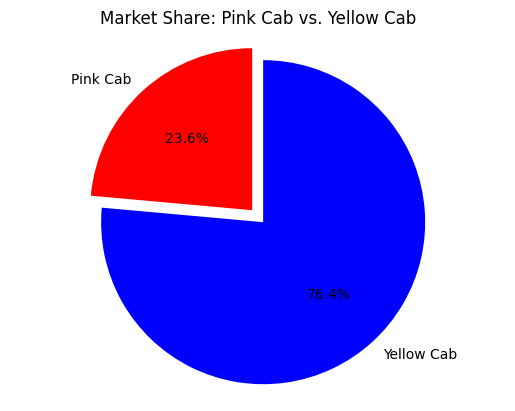

In [80]:
# Filter the dataframe based on Company
pink_cab_df = combined_df[(combined_df['Company'] == 'Pink Cab')]
yellow_cab_df = combined_df[(combined_df['Company'] == 'Yellow Cab')]

# Total number of trips for each company
pink_cab_trips = pink_cab_df.shape[0]
yellow_cab_trips = yellow_cab_df.shape[0]

# Total number of trips in the market
total_trips = combined_df.shape[0]

# Market share for each company
pink_cab_market_share = pink_cab_trips / total_trips * 100
yellow_cab_market_share = yellow_cab_trips / total_trips * 100

# Pie chart to visualize the market share
labels = ['Pink Cab', 'Yellow Cab']
sizes = [pink_cab_market_share, yellow_cab_market_share]
colors = ['r', 'b']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Market Share: Pink Cab vs. Yellow Cab')
plt.show()

### 2. Customer Retention
   -  Customer retention is crucial for the long-term success of a cab company.

Retention Rates for Year 2016:
Pink Cab: 46.28%
Yellow Cab: 26.37%

Retention Rates for Year 2017:
Pink Cab: 52.46%
Yellow Cab: 35.56%



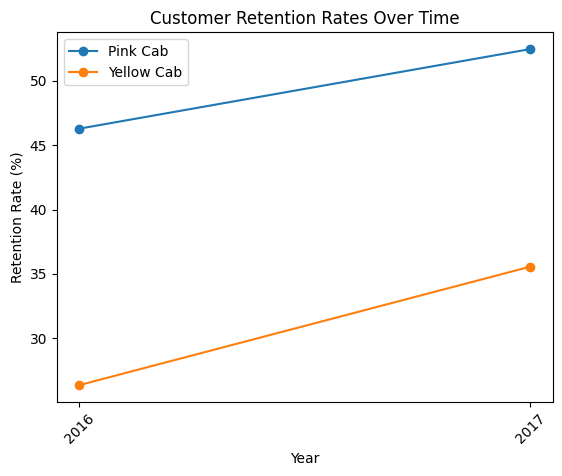

In [81]:
# Determine the time frames within the specified time period
start_date = '2016-01-31'
end_date = '2018-12-31'
time_frames = pd.date_range(start=start_date, end=end_date, freq='Y')

# Calculate the customer retention rate for each company for each time frame
retention_rates_pink_cab = []
retention_rates_yellow_cab = []

for i in range(len(time_frames) - 1):
    start_date = time_frames[i].strftime('%Y-%m-%d')
    end_date = time_frames[i+1].strftime('%Y-%m-%d')

    #determine the start amd end customers of tje pink cab
    pink_cab_start_customers = len(pink_cab_df[pink_cab_df['Date of Travel'] <= start_date]['Customer ID'].unique())
    pink_cab_end_customers = len(pink_cab_df[pink_cab_df['Date of Travel'] <= end_date]['Customer ID'].unique())

    # determine the new customers throughout the year
    pink_cab_new_customers = len(pink_cab_df[(pink_cab_df['Date of Travel'] >= start_date) & (pink_cab_df['Date of Travel'] <= end_date)]['Customer ID'].unique())

    # determine the start and end customers pf tje pink cab
    yellow_cab_start_customers = len(yellow_cab_df[yellow_cab_df['Date of Travel'] <= start_date]['Customer ID'].unique())
    yellow_cab_end_customers = len(yellow_cab_df[yellow_cab_df['Date of Travel'] <= end_date]['Customer ID'].unique())

    # determine the new customers throughout the year
    yellow_cab_new_customers = len(yellow_cab_df[(yellow_cab_df['Date of Travel'] >= start_date) & (yellow_cab_df['Date of Travel'] <= end_date)]['Customer ID'].unique())

    # calculating the retention rate
    pink_cab_retention_rate = (pink_cab_end_customers - pink_cab_new_customers) / pink_cab_start_customers * 100
    yellow_cab_retention_rate = (yellow_cab_end_customers - yellow_cab_new_customers) / yellow_cab_start_customers * 100

    retention_rates_pink_cab.append(pink_cab_retention_rate)
    retention_rates_yellow_cab.append(yellow_cab_retention_rate)


for i in range(len(time_frames) - 1):
    year = time_frames[i].year
    pink_cab_rate = retention_rates_pink_cab[i]
    yellow_cab_rate = retention_rates_yellow_cab[i]

    print(f"Retention Rates for Year {year}:")
    print("Pink Cab: {:.2f}%".format(pink_cab_rate))
    print("Yellow Cab: {:.2f}%".format(yellow_cab_rate))
    print()

# Plotting retention rates for Pink Cab
plt.plot(time_frames[:-1], retention_rates_pink_cab, marker='o', label='Pink Cab')

# Plotting retention rates for Yellow Cab
plt.plot(time_frames[:-1], retention_rates_yellow_cab, marker='o', label='Yellow Cab')

# Set title and labels
plt.title('Customer Retention Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Retention Rate (%)')

# Set x-axis tick labels
plt.xticks(time_frames[:-1], [str(year) for year in time_frames[:-1].year], rotation=45)

# Add legend
plt.legend()

# Display the plot
plt.show()

### 3. Customer Segmentation

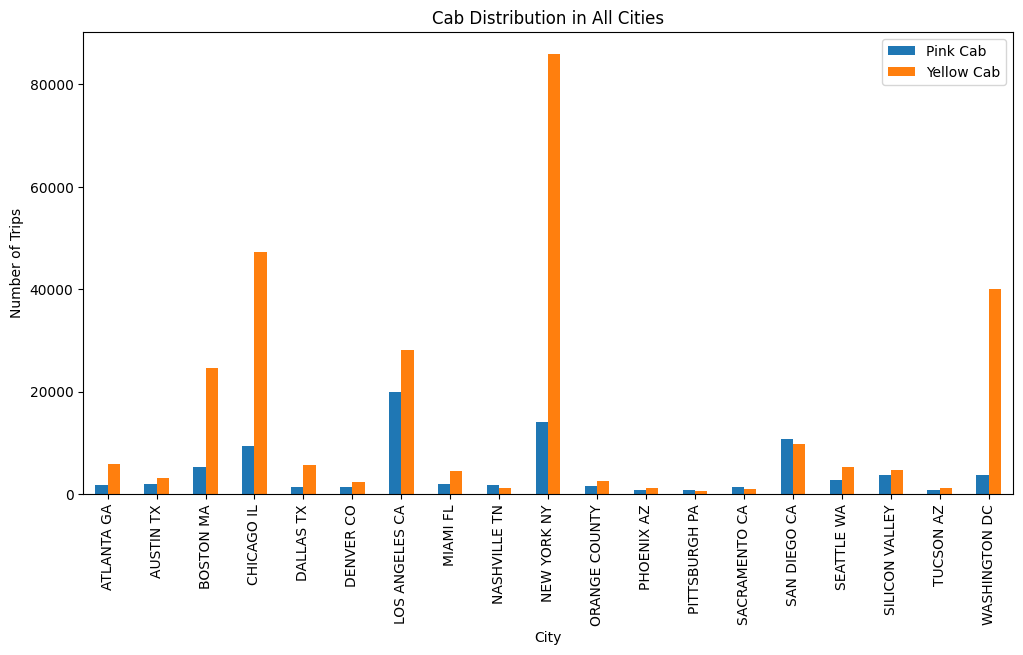

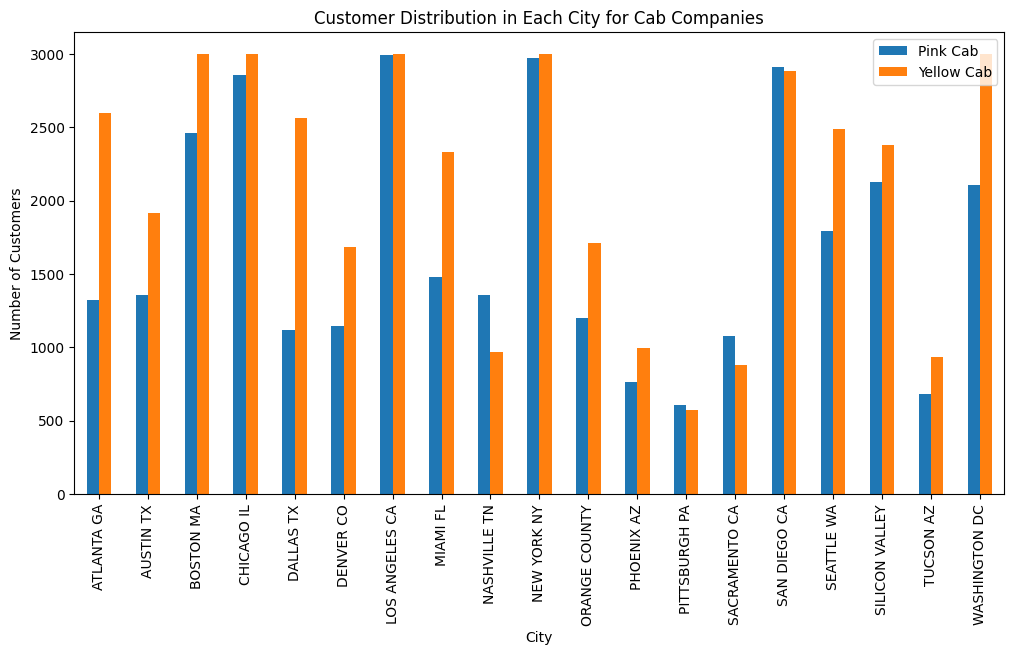

In [82]:
cab_distribution = combined_df.groupby(['City', 'Company']).size().unstack(level=1)

# Stacked bar graph for cab distribution in all cities
cab_distribution.plot(kind='bar', figsize=(12, 6))
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.title('Cab Distribution in All Cities')
plt.legend()
plt.show()

# Group the data by city and cab company and count the number of unique customer IDs
customer_distribution = combined_df.groupby(['City', 'Company'])['Customer ID'].nunique().unstack()
# Create a bar graph to visualize the customer distribution or presence in each city for the cab companies
customer_distribution.plot(kind='bar', figsize=(12, 6))
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution in Each City for Cab Companies')
plt.legend()
plt.show()

## 4. Customer Preferences

* Determining customer preference based on gender, payment methods and age

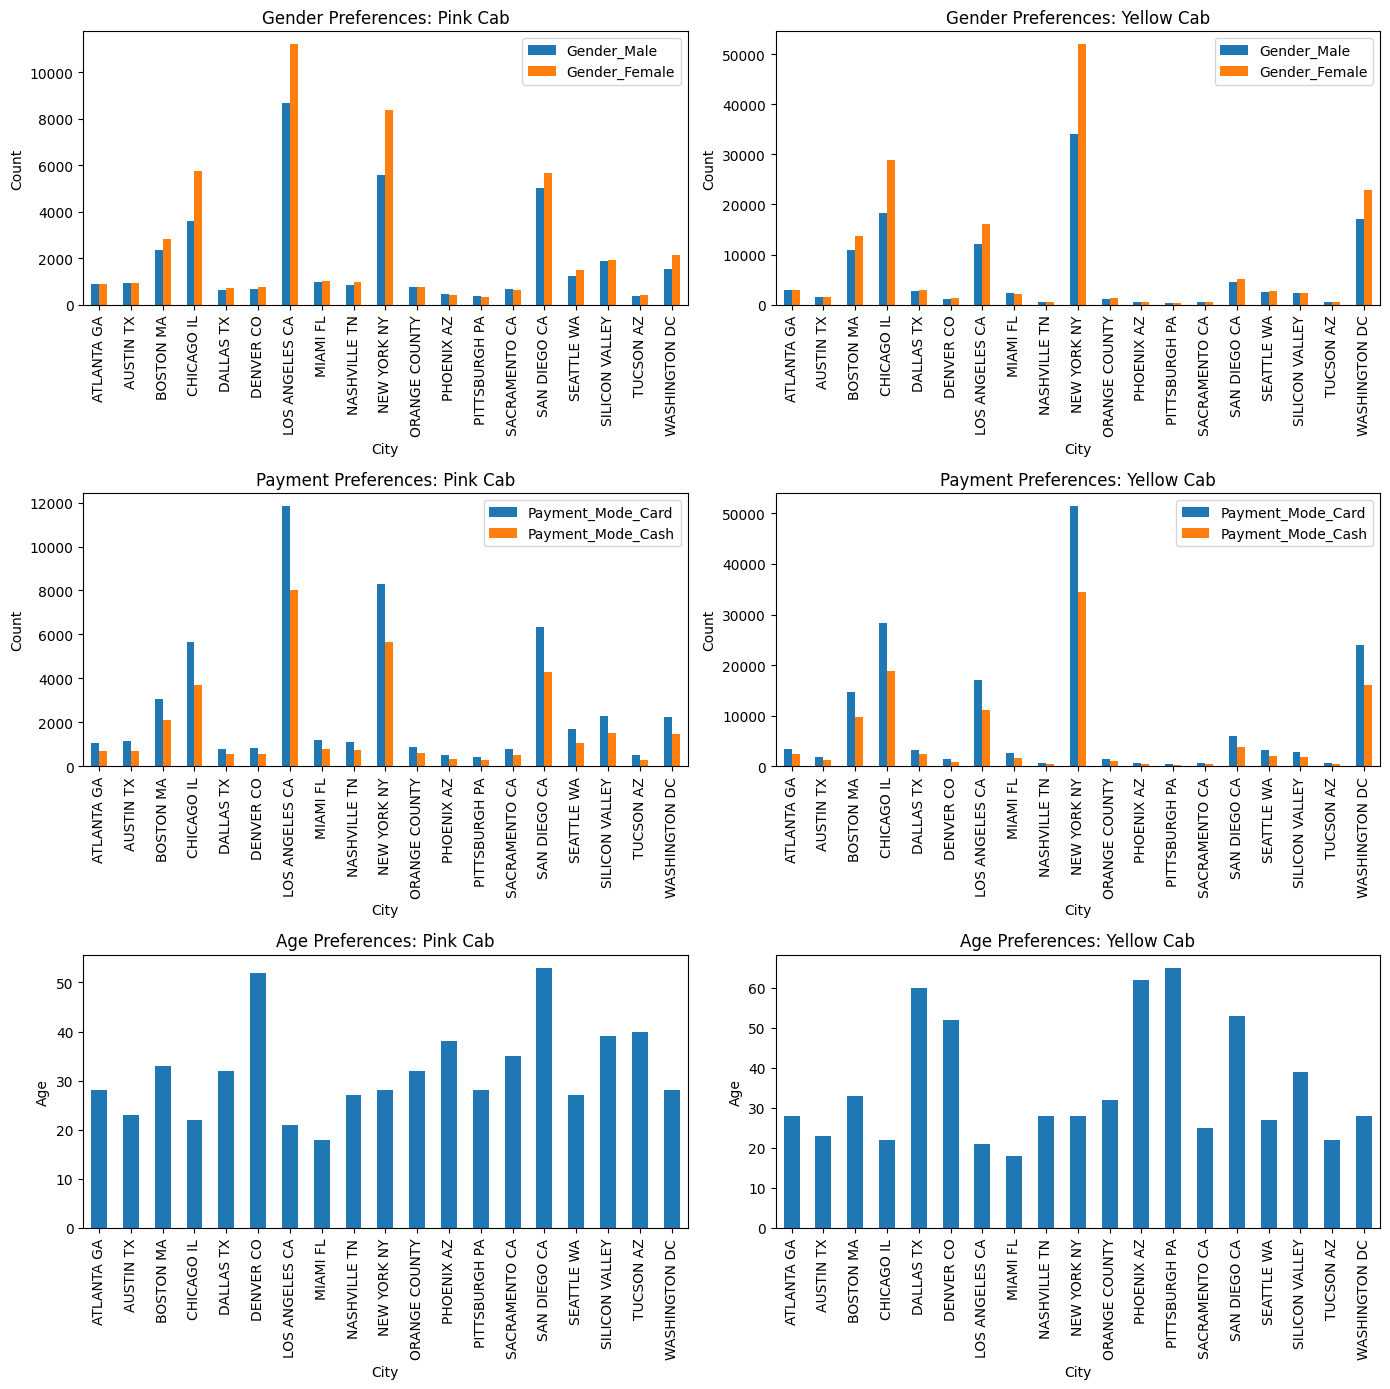

In [83]:
# Define the factors to consider for customer preferences
gender_factors = ['Gender_Male', 'Gender_Female']
payment_factors = ['Payment_Mode_Card', 'Payment_Mode_Cash']
age_factor = 'Age'

# Customer preferences for each factor and cab company
pink_cab_preferences = pink_cab_df.groupby('City')[gender_factors + payment_factors + [age_factor]].sum()
yellow_cab_preferences = yellow_cab_df.groupby('City')[gender_factors + payment_factors + [age_factor]].sum()

# Customer preferences for age factor and cab company
pink_cab_preferences_age = pink_cab_df.groupby('City')[gender_factors + payment_factors + [age_factor]].first()
yellow_cab_preferences_age = yellow_cab_df.groupby('City')[gender_factors + payment_factors + [age_factor]].first()


# Creating separate graphs for gender preferences, payment preferences, and age preferences for each cab company
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))

# Gender Preferences
pink_cab_preferences[gender_factors].plot(kind='bar', ax=axes[0, 0], title='Gender Preferences: Pink Cab')
axes[0, 0].set_xlabel('City')
axes[0, 0].set_ylabel('Count')

yellow_cab_preferences[gender_factors].plot(kind='bar', ax=axes[0, 1], title='Gender Preferences: Yellow Cab')
axes[0, 1].set_xlabel('City')
axes[0, 1].set_ylabel('Count')

# Payment Preferences
pink_cab_preferences[payment_factors].plot(kind='bar', ax=axes[1, 0], title='Payment Preferences: Pink Cab')
axes[1, 0].set_xlabel('City')
axes[1, 0].set_ylabel('Count')

yellow_cab_preferences[payment_factors].plot(kind='bar', ax=axes[1, 1], title='Payment Preferences: Yellow Cab')
axes[1, 1].set_xlabel('City')
axes[1, 1].set_ylabel('Count')

# Age Preferences
pink_cab_preferences_age[age_factor].plot(kind='bar', ax=axes[2, 0], title='Age Preferences: Pink Cab')
axes[2, 0].set_xlabel('City')
axes[2, 0].set_ylabel('Age')

yellow_cab_preferences_age[age_factor].plot(kind='bar', ax=axes[2, 1], title='Age Preferences: Yellow Cab')
axes[2, 1].set_xlabel('City')
axes[2, 1].set_ylabel('Age')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


### 5. Profits per kilometer

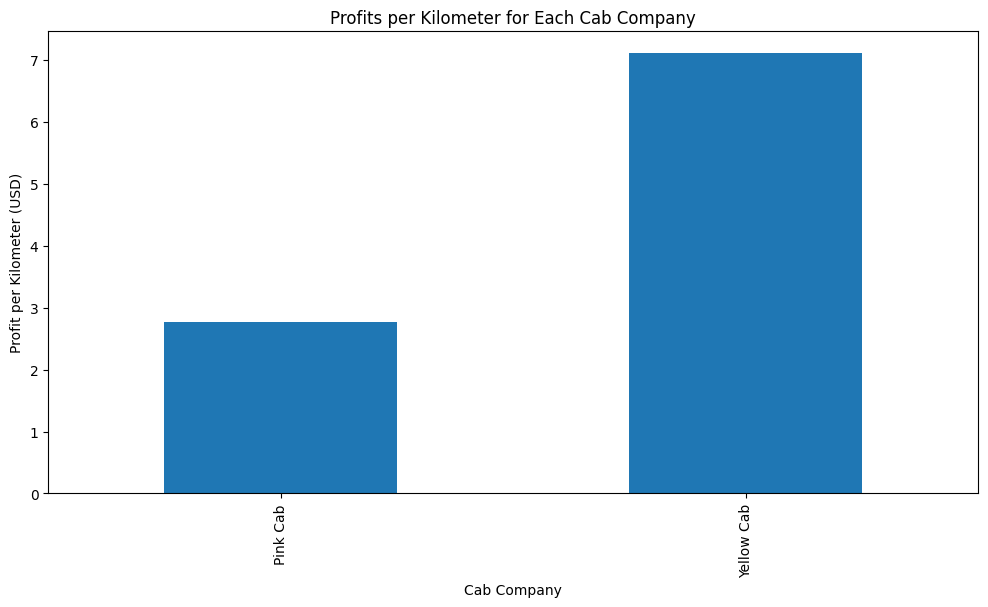

In [84]:
# Calculate profits per kilometer for each cab company
combined_df['Profit per KM'] = (combined_df['Price Charged'] - combined_df['Cost of Trip']) / combined_df['KM Travelled']

# Group the data by cab company and calculate the average profit per kilometer
profits_per_km = combined_df.groupby('Company')['Profit per KM'].mean()

# Create a bar graph to visualize the profits per kilometer for each cab company
profits_per_km.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Cab Company')
plt.ylabel('Profit per Kilometer (USD)')
plt.title('Profits per Kilometer for Each Cab Company')
plt.show()


### 5. Demand for days of the week

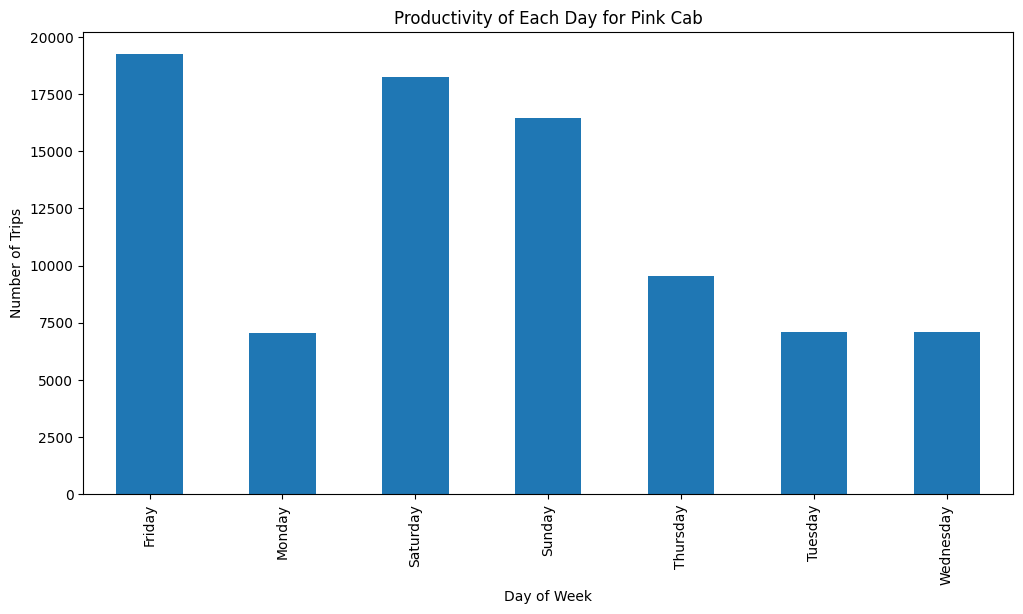

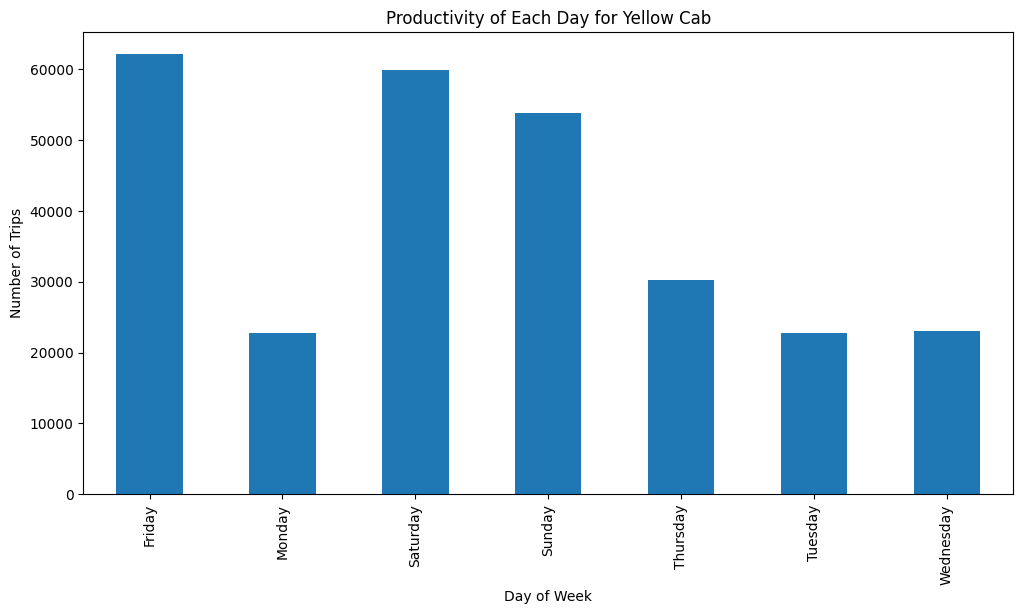

In [85]:

# Convert the "Date of Travel" column to datetime format
combined_df['Date of Travel'] = pd.to_datetime(combined_df['Date of Travel'])

# Extract the day of the week
combined_df['Day of Week'] = combined_df['Date of Travel'].dt.day_name()

# Group the data by cab company and day of the week, and calculate the total number of trips
trips_per_day = combined_df.groupby(['Company', 'Day of Week']).size().unstack(level=1)

# Create visualizations for each cab company to compare the productivity of each day and assess the impact of holidays
cab_companies = combined_df['Company'].unique()

for company in cab_companies:
    trips_company = trips_per_day.loc[company]
    holidays = ['Saturday', 'Sunday']  # Define the holidays

    # Bar graph to compare the productivity of each day
    trips_company.plot(kind='bar', figsize=(12, 6))
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Trips')
    plt.title(f'Productivity of Each Day for {company}')
    plt.show()




# Recommendation

## After evaluating both the cab companies on following points and found Yellow cab better than Pink cab:
- Market Share -> Yellow Cab has a higher market share of 76.4% throughout the whole cities as compared to 23.6% for Pink cab.
- Customer Retention -> Customer retention is crucial for the long-term success of the cab company. In 2016, Pink Cab had a higher retention rate at 46.28% as compared to Yelow Cab at 26.37%. IN 2017, Pink cab increased its customer retention to 52.46% as compared to 35.56% fro Yellow Cab. In general, Pink Cab has had a better customer retention rate throughout its operation period.
- Customer Segmentation -> Yellow Cab is the most favoured in all cities except NASHVILLE TN, PITTSBURGH PA, SACRAMENTO CA, and SAN DIEGO CA where Pionk cab had an upper hand.
- Customer Preferences -> Most customers prefer to pay with card as compared to cash payment. The female gender are the majority users of the cabs for both cabs however, more men preferred to use the Pink Cab as compared to Yellow cab.
- Profits per kilometer -> The yellow cab company makes 7.1 times of profit per kilometer as compared to 2.8 for the pink cab.
- Demand throughout the week -> The cab demenad for both cabs is equal through the week with Friday and Saturday leading in terms of demand.

## On the basis of the above analysis, Yellow Cab is a better company to invest in. The company has a large market share which mens it servers a large customer base and better profits.


In [86]:
combined_df.shape[0]

359392

In [87]:
combined_df.shape

(359392, 18)